Total points for this HW: 100.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

**Answer**: A model based urban planning policy is where interpretability is critical. Because this is an exercise that involves **convincing multiple stakeholders to buy-in**. Being able to explain the reasons, which might be based on a predictive model output, is essential. In this case, simple, but highly interpretable model, such as a single decision tree, is preferred. 

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

**Answer**: A predictive model based Stop-and-Frisk solution, using demographic and crime history data, will be a great example of where accuracy is essential. **Productivity is crucial in large scale operations**, hence having high accuracy can allow police to save time by avoiding wasting time on the wrong suspects. 

In this case, a random forest with solid accuracy performance will be preferrable.

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

**Answer**: I will try to use the out-of-box feature importance output from Random Forest. Although it is not as straightforward as looking at the tree split from a decision tree, it provides a good sense of the power of the features on average. 

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [2]:
import pandas as pd
import numpy as np

In [3]:
# StringIO library is python version dependent
try:
    # python 3
    from io import StringIO
except: 
    # python 2
    from StringIO import StringIO

thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [4]:
# Convert Column Type
df['cylinders'] = df['cylinders'].astype('category')
df['weight'] = df['weight'].astype('category')
df.dtypes

MPG            object
cylinders    category
HP              int64
weight       category
dtype: object

In [5]:
def findMPG(target):
    
    label, count = np.unique(target, return_counts=True)
    print("the most common MPG value is '{}'; count is {}".format(label[np.argmax(count)], count.max()))
    
    return

findMPG(df['MPG'])

the most common MPG value is 'bad'; count is 15


In [6]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [7]:
def CategoricalRules(df):
    
    # Find Categorical Columns (exclude MPG)
    cols = list(df.iloc[:, 1:len(df.columns)].select_dtypes(include = ['category', 'object']))
    
    for col in cols: 
        
        # Find Unique Values
        unique_val = np.unique(df[col])     
        
        # Split Data by Values
        
        for rule in unique_val:
            
            # Seperate full data based on the split condition
            Y = df[df[col] == rule].iloc[:, 0]
            N = df[df[col] != rule].iloc[:, 0]
            
            # Calculate the number of Good / Bad in each split
            goodY = np.count_nonzero(Y == 'good')
            badY = np.count_nonzero(Y == 'bad')
            goodN = np.count_nonzero(N == 'good')
            badN = np.count_nonzero(N == 'bad')
            
            # Calculate Infomation Gain for the Split
            infoGain = InformationGain(goodY,badY,goodN,badN)
            
            print('---')
            print('Splitting on {} = {}'.format(col, rule))
            print('# of Good in Y: {}'.format(goodY))
            print('# of Bad in Y: {}'.format(badY))
            print('# of Good in N: {}'.format(goodN))
            print('# of Bad in N: {}'.format(badN))
            print("Info Gain: {}".format(infoGain))
    
    return

CategoricalRules(df)

---
Splitting on cylinders = 4
# of Good in Y: 5
# of Bad in Y: 4
# of Good in N: 0
# of Bad in N: 11
Info Gain: 0.3652938975319328
---
Splitting on cylinders = 6
# of Good in Y: 0
# of Bad in Y: 6
# of Good in N: 5
# of Bad in N: 9
Info Gain: 0.15307795338969116
---
Splitting on cylinders = 8
# of Good in Y: 0
# of Bad in Y: 5
# of Good in N: 5
# of Bad in N: 10
Info Gain: 0.1225562489182657
---
Splitting on weight = light
# of Good in Y: 3
# of Bad in Y: 3
# of Good in N: 2
# of Bad in N: 12
Info Gain: 0.09710717945150363
---
Splitting on weight = medium
# of Good in Y: 2
# of Bad in Y: 6
# of Good in N: 3
# of Bad in N: 9
Info Gain: 0.0
---
Splitting on weight = weighty
# of Good in Y: 0
# of Bad in Y: 6
# of Good in N: 5
# of Bad in N: 9
Info Gain: 0.15307795338969116


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [8]:
def numercialRules(df):
    
    # find numberical columns
    cols = list(df.iloc[:, 1:len(df.columns)].select_dtypes(exclude = ['category', 'object']))
    
    # sort and find midpoint of numerical
    for col in cols:
        unique_val = np.unique(df[cols])
        print("--- Unique Numerical Values ---")
        print(unique_val)
        
        # Find midpoints of two sorted values as splitting rules
        rules = []
        for i in range(0, len(unique_val)):
            try:
                rules.append((unique_val[i]+unique_val[i+1])/2)
            except IndexError:
                pass
        print("--- Mid Points ---")
        print(rules)
        
        # Split the data based on numerical rules
        for rule in rules:
            
            # Seperate full data based on the split condition
            Y = df[df[col] > rule].iloc[:, 0]
            N = df[df[col] <= rule].iloc[:, 0]
            
            # Calculate the number of Good / Bad in each split
            goodY = np.count_nonzero(Y == 'good')
            badY = np.count_nonzero(Y == 'bad')
            goodN = np.count_nonzero(N == 'good')
            badN = np.count_nonzero(N == 'bad')
            
            # Calculate Infomation Gain for the Split
            infoGain = InformationGain(goodY,badY,goodN,badN)
            
            print('---')
            print('Splitting on {} > {}'.format(col, rule))
            print('# of Good in Y: {}'.format(goodY))
            print('# of Bad in Y: {}'.format(badY))
            print('# of Good in N: {}'.format(goodN))
            print('# of Bad in N: {}'.format(badN))
            print("Info Gain: {}".format(infoGain))
        
    return

numercialRules(df)

--- Unique Numerical Values ---
[ 65  75  81  85  89  90  92  93  94  95 100 110 139 145 170 175 190]
--- Mid Points ---
[70.0, 78.0, 83.0, 87.0, 89.5, 91.0, 92.5, 93.5, 94.5, 97.5, 105.0, 124.5, 142.0, 157.5, 172.5, 182.5]
---
Splitting on HP > 70.0
# of Good in Y: 4
# of Bad in Y: 15
# of Good in N: 1
# of Bad in N: 0
Info Gain: 0.10591493339411553
---
Splitting on HP > 78.0
# of Good in Y: 3
# of Bad in Y: 15
# of Good in N: 2
# of Bad in N: 0
Info Gain: 0.22625794497561413
---
Splitting on HP > 83.0
# of Good in Y: 2
# of Bad in Y: 15
# of Good in N: 3
# of Bad in N: 0
Info Gain: 0.36710265610273324
---
Splitting on HP > 87.0
# of Good in Y: 2
# of Bad in Y: 14
# of Good in N: 3
# of Bad in N: 1
Info Gain: 0.21417094500762923
---
Splitting on HP > 89.5
# of Good in Y: 1
# of Bad in Y: 14
# of Good in N: 4
# of Bad in N: 1
Info Gain: 0.36577659947122626
---
Splitting on HP > 91.0
# of Good in Y: 1
# of Bad in Y: 13
# of Good in N: 4
# of Bad in N: 2
Info Gain: 0.2759267455941731
---

d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

**Answer**: the best binary split is HP > 92.5 because it has the highest info gain of 0.51. For the two child nodes created by this split, HP <= 92.5 requires further partitioning because there is still a mix of Good / Bad in this node.

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [9]:
def infoGain(df, col, val, col_type):
    '''
    This function calculates the information gain given a split condition and counts of labels of the two child nodes
    Input: dataframe, column of the split, value of the split, and column type
    Output: information gain, list of counts by label
    '''
    
    if col_type == "cat":
        # Seperate full data based on the split condition
        Y = df[df[col] == val].iloc[:, 0]
        N = df[df[col] != val].iloc[:, 0]
    else: 
        # Seperate full data based on the split condition
        Y = df[df[col] > val].iloc[:, 0]
        N = df[df[col] <= val].iloc[:, 0]
    
    # Calculate the number of Good / Bad in each split
    goodY = np.count_nonzero(Y == 'good')
    badY = np.count_nonzero(Y == 'bad')
    goodN = np.count_nonzero(N == 'good')
    badN = np.count_nonzero(N == 'bad')

    # Calculate Infomation Gain for the Split
    infoGain = InformationGain(goodY,badY,goodN,badN)
        
    return infoGain, [goodY, badY, goodN, badN]

def FindSplit(df):
    
    '''
    This function performs a decision tree process for any given data frame. It recurses until all stop
    conditions are met (e.g. no more impurity in child node)
    Input: data frame
    Output: None
    '''
    
    # Find categorical and numerical columns, exclude target column
    cat_col =list(df.iloc[:, 1:len(df.columns)].select_dtypes(include = ['category', 'object']))
    num_col =list(df.iloc[:, 1:len(df.columns)].select_dtypes(exclude = ['category', 'object']))
    
    # Define all splitting rules
    cols = []
    rules = [] # split condition (e.g. 92.5)
    split_name = [] # split name (e.g. HP > 92.5)
    info_gain = [] # info gain of this split (e.g. 0.501)
    node_mix = [] # count of mixed label at child node (e.g. [0, 13, 0, 5])
    
    # Calculate info gain, child node impurity, and log split details for Categorical Columns
    for col in cat_col:
        unique_val = np.unique(df[col])
        for val in unique_val:
            cols.append([col, "cat"])
            rules.append(val)
            split_name.append(str(col) + " = " + str(val))
            
            gain, mix = infoGain(df, col, val, 'cat')
            info_gain.append(gain)
            node_mix.append(mix)
    
    # Calculate info gain, child node impurity, and log split details for Numerical Columns
    for col in num_col:
        unique_val = np.unique(df[col])
        for i in range(0, len(unique_val)):
            try:
                midpoint = (unique_val[i]+unique_val[i+1])/2
                cols.append([col, "num"])
                rules.append(midpoint)
                split_name.append(str(col) + " > " + str(midpoint))
                
                gain, mix = infoGain(df, col, midpoint, 'num')
                info_gain.append(gain)
                node_mix.append(mix)
            
            except IndexError:
                pass
    
    # Get the Index of the split condition based on Info Gain
    best_split_idx = np.argmax(info_gain)
    
    print('--- Split on {} ---'.format(split_name[best_split_idx]))
    print('Info Gain: {}'.format(info_gain[best_split_idx]))
    print('Y Node: {} Good | {} Bad'.format(node_mix[best_split_idx][0], node_mix[best_split_idx][1]))
    print('N Node: {} Good | {} Bad'.format(node_mix[best_split_idx][2], node_mix[best_split_idx][3]))
    print('-------------------')
    
    # Recurse FindSplit() on child node(s)
    # Child Node Impurity Count in this list format [goodY, badY, goodN, badN]
    
    if node_mix[best_split_idx][0] != 0 and node_mix[best_split_idx][1] !=0:
        
        # recurse splitting on the Y node
        print('Next: Split on Y node because it is impure')
        print(' ')
        
        # Subset Child Node based on Categorical / Numerical Condition
        if cols[best_split_idx][1] == "cat":
            FindSplit(df[df[cols[best_split_idx][0]] == rules[best_split_idx]])
        else: 
            FindSplit(df[df[cols[best_split_idx][0]] > rules[best_split_idx]])
    
    elif node_mix[best_split_idx][2] != 0 and node_mix[best_split_idx][3] !=0:
       
        # recurse splitting on the N node
        print('Next: Split on N node because it is impure')
        print(' ')
        
        # Subset Child Node based on Categorical / Numerical Condition
        if cols[best_split_idx][1] == "cat":
            FindSplit(df[df[cols[best_split_idx][0]] != rules[best_split_idx]])
        else: 
            FindSplit(df[df[cols[best_split_idx][0]] <= rules[best_split_idx]])
    else:
        print('All Child Nodes are Pure. Stop.')
        
    return

FindSplit(df)

--- Split on HP > 92.5 ---
Info Gain: 0.5091859254608121
Y Node: 0 Good | 13 Bad
N Node: 5 Good | 2 Bad
-------------------
Next: Split on N node because it is impure
 
--- Split on cylinders = 4 ---
Info Gain: 0.8631205685666309
Y Node: 5 Good | 0 Bad
N Node: 0 Good | 2 Bad
-------------------
All Child Nodes are Pure. Stop.


f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

**Answer**: See output from cell above.

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

?,8,70,light -> Bad

?,6,113,medium -> Bad

?,4,83,weighty -> Good

?,4,95,weighty -> Bad


### Question 3, Predicting burden of disease （40 pts)

In [27]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


In [146]:
data.shape

(130, 16)

### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
seed = 123
    
def encoding(df):
    
    '''
    This function performs label encoding for categorical columns with text values
    Input: data frame
    Output: data frame with encoded values
    '''
    
    from sklearn.preprocessing import LabelEncoder
    
    columnsToEncode = list(df.select_dtypes(include = ['category', 'object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print("Error Encoding: {}".format(feature))
    
    return df

def treeDepthAnalysis(X_train, X_test, Y_train, Y_test, min_depth, max_depth):
    
    '''
    This function performs analysis of accuracy over a range of decision tree depth range. Tree depth increments 
    by two.
    Inputs: 
        - X_train: independent var of training set
        - X_test: independent var of testing set
        - Y_train: dependent var of training set
        - Y_test: dependent var of testing set
        - min_depth: the minimum tree depth of the analysis
        - max_depth: the maximum tree depth of the analysis
    Outputs:
        - depth_range: a list of tree depth used in the analysis
        - results: a list of accuracy correspond to the tree depth
    '''
    
    depth_range = np.arange(min_depth, max_depth + 2, 2)
    print('---  Tree Depth ---')
    print(depth_range)
    print('---  Accuracy on Test Set ---')
    
    results = []
    for depth in depth_range: 
        clf = DecisionTreeClassifier(max_depth = depth, random_state = seed)
        clf.fit(X_train, Y_train)
        Y_predict = clf.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_predict)
        results.append(accuracy)
        print(accuracy)
    
    return depth_range, results


### MAIN Execution Process ###

# Encode Data
encoded_data = encoding(data)

# Split Data to Training and Testing
X = encoded_data.iloc[:, 0:len(encoded_data.columns)-1]
Y = encoded_data['BurdenOfDisease']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = seed)

# Run the Tree Depth Analysis
depth_range, results = treeDepthAnalysis(X_train, X_test, Y_train, Y_test, 2, 12)

---  Tree Depth ---
[ 2  4  6  8 10 12]
---  Accuracy on Test Set ---
0.604651162791
0.697674418605
0.651162790698
0.651162790698
0.651162790698
0.651162790698


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

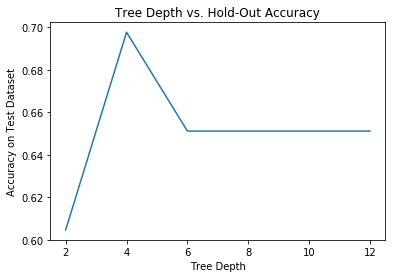

In [119]:
import matplotlib.pylab as plt

plt.plot(depth_range, results);
plt.xlabel('Tree Depth');
plt.ylabel('Accuracy on Test Dataset');
plt.title('Tree Depth vs. Hold-Out Accuracy');

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [144]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint

def GridSearch(X_train, Y_train, model, params, params_values, nfold):
    '''
    This function performs a Grid Search to find the Maximum Tree Depth that provides
    the best accuracy based on Cross Validation.
    Inputs:
        - X_train: independent vars of training set
        - Y_train: dependent vars of training set
        - model: model object for grid search
        - params: a list of model parameters for grid search (e.g. [max_depth])
        - params_values: a list of parameter values for grid search (e.g. [[2, 6, 8, 10]])
        - nfold: number of folds for cross validation
    Outputs: the Best Tree Depth
    '''
    param_grid = {}
    for i in range(0, len(params)):
        param_grid[params[i]] = params_values[i]
        
    grid_search = GridSearchCV(model, param_grid, cv=nfold)
    grid_search.fit(X_train, Y_train)
    best_params = grid_search.best_params_
    
    print('--- Grid Search Results ---')
    pprint(grid_search.grid_scores_)
    
    return best_params

def TunedDT(X_train, X_test, Y_train, Y_test, best_depth):
    '''
    This function learn a decision tree based on the best max tree depth; then test the accuracy on a hold-out sample.
    Inputs: 
        - X_train: independent var of training set
        - X_test: independent var of testing set
        - Y_train: dependent var of training set
        - Y_test: dependent var of testing set
        - best_depth: the best Max Tree Depth based on Grid Search
    Outputs: None
    '''
    
    clf = DecisionTreeClassifier(random_state = seed, max_depth = best_depth)
    clf.fit(X_train, Y_train)
    Y_predict = clf.predict(X_test)
    print('--- Best Parameters ---')
    print('Tree Depth: {}'.format(best_depth))
    print('--- Result on Hold-Out Sample using Best Tree Depth ---')
    print(accuracy_score(Y_test, Y_predict))
    
    return


### MAIN Execution Process ###

# Find the Best Tree Depth using Grid Search and Cross Validation
best_params = GridSearch(X_train, Y_train, 
                        DecisionTreeClassifier(random_state = seed), 
                        ['max_depth'], [[2, 4, 6, 8, 10, 12]], 3)

# Measure Accuracy on Hold-out Samples using the Best Tree Depth
TunedDT(X_train, X_test, Y_train, Y_test, best_params['max_depth'])

# Reference: https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0

--- Grid Search Results ---
[mean: 0.62069, std: 0.01921, params: {'max_depth': 2},
 mean: 0.62069, std: 0.04128, params: {'max_depth': 4},
 mean: 0.64368, std: 0.04194, params: {'max_depth': 6},
 mean: 0.64368, std: 0.04194, params: {'max_depth': 8},
 mean: 0.64368, std: 0.04194, params: {'max_depth': 10},
 mean: 0.64368, std: 0.04194, params: {'max_depth': 12}]
--- Best Parameters ---
Tree Depth: 6
--- Result on Hold-Out Sample using Best Tree Depth ---
0.651162790698


/Users/Ian/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

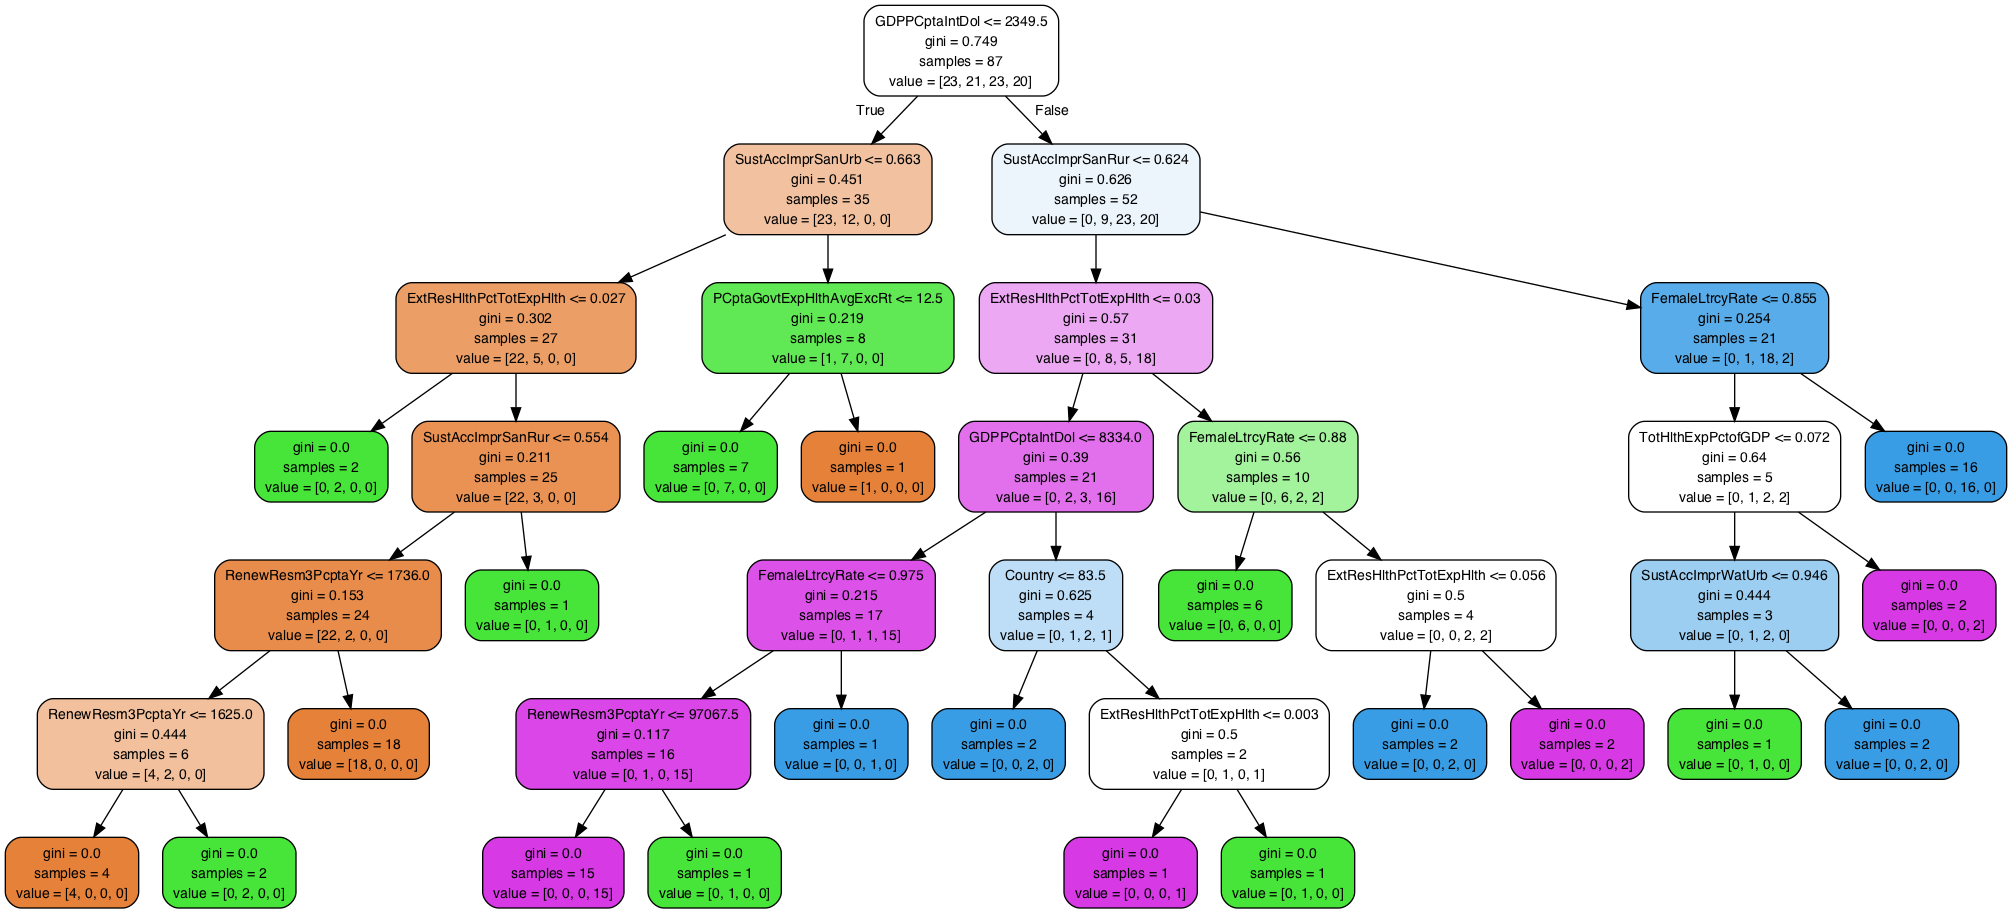

In [139]:
# Slight different implementation due to Python 3 dependency

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

string = StringIO()

dt = DecisionTreeClassifier(random_state=123, max_depth=best_depth)
dt.fit(X_train,Y_train)

# Create graph of the classifier
export_graphviz(dt, out_file=string, feature_names=X_train.columns.values,
                filled=True, rounded=True,
                special_characters=False)

# Print the image created above, in a pretty format
graph = pydotplus.graph_from_dot_data(string.getvalue())  
Image(graph.create_png())

# Code Reference: https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def TunedRF(X_train, X_test, Y_train, Y_test, best_depth, best_estimators):
    '''
    This function learn a decision tree based on the best max tree depth; then test the accuracy on a hold-out sample.
    Inputs: 
        - X_train: independent var of training set
        - X_test: independent var of testing set
        - Y_train: dependent var of training set
        - Y_test: dependent var of testing set
        - best_depth: the best Max Tree Depth based on Grid Search
        - best_estimators: the best number of estimator based on Grid Search
    Outputs: None
    '''
    
    RF = RandomForestClassifier(random_state = seed, max_depth = best_depth, n_estimators = best_estimators)
    RF.fit(X_train, Y_train)
    Y_predict = RF.predict(X_test)
    
    print('--- Best Parameters ---')
    print('Tree Depth: {} | Estimators: {}'.format(best_depth, best_estimators))
    print('--- Result on Hold-Out Sample using Best Tree Depth and Estimators ---')
    print(accuracy_score(Y_test, Y_predict))
    
    return

best_params = GridSearch(X_train, Y_train, 
                        RandomForestClassifier(random_state = seed), 
                        ['max_depth', 'n_estimators'], 
                         [[2, 4, 6, 8, 10, 12], [3, 5, 10]], 3)

TunedRF(X_train, X_test, Y_train, Y_test, best_params['max_depth'], best_params['n_estimators'])

--- Grid Search Results ---
[mean: 0.63218, std: 0.02727, params: {'max_depth': 2, 'n_estimators': 3},
 mean: 0.58621, std: 0.05833, params: {'max_depth': 2, 'n_estimators': 5},
 mean: 0.65517, std: 0.04489, params: {'max_depth': 2, 'n_estimators': 10},
 mean: 0.57471, std: 0.01889, params: {'max_depth': 4, 'n_estimators': 3},
 mean: 0.64368, std: 0.05666, params: {'max_depth': 4, 'n_estimators': 5},
 mean: 0.67816, std: 0.04291, params: {'max_depth': 4, 'n_estimators': 10},
 mean: 0.58621, std: 0.04823, params: {'max_depth': 6, 'n_estimators': 3},
 mean: 0.60920, std: 0.06898, params: {'max_depth': 6, 'n_estimators': 5},
 mean: 0.65517, std: 0.08717, params: {'max_depth': 6, 'n_estimators': 10},
 mean: 0.59770, std: 0.08060, params: {'max_depth': 8, 'n_estimators': 3},
 mean: 0.62069, std: 0.05772, params: {'max_depth': 8, 'n_estimators': 5},
 mean: 0.62069, std: 0.08855, params: {'max_depth': 8, 'n_estimators': 10},
 mean: 0.60920, std: 0.06346, params: {'max_depth': 10, 'n_estimator

/Users/Ian/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

**Answer** In this particular example, Decision Tree offers better performances in both accuracy and interpretability over the same sets of Training and Testing data. The accuracy are consistent over a range of Decision Tree hyperparameters based on part c). Furthermore, we can understand the specific split conditions using PydotPlus package. 

In contrast, accuracy varied significantly over a range of Random Forest hyperparameters. This may be due to the overfitting of limited amount of samples. There are only 160 total samples, which was splitted into 105 training and 55 testing samples. Random Forest then subset the 105 training data through bootstrapping when building trees. This further constrainted the amount of training data for Random Forest to develop solid models, and led to sub-optimal results. 